In [ ]:
from zipfile import ZipFile
import glob
from skimage.io import imread
from skimage.color import gray2rgb
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
# dataset_path = '/content/drive/MyDrive/CSE428_LAB/Project/Group_2.zip'
dataset_path = '/content/drive/MyDrive/Group_2.zip'
dataset_path = '/content/drive/MyDrive/CSE428_LAB/Project/Group_2.zip'
with ZipFile(dataset_path, 'r') as zip:
  zip.extractall()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam


def custom_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten layer to transition from convolutional to dense layers
    model.add(Flatten())

    # Dense (fully connected) layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



# Load and preprocess the data
train_datagen = train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Group_2/train',
    target_size=(224, 224),  # Update the target size
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Group_2/test',
    target_size=(224, 224),  # Update the target size
    batch_size=32,
    class_mode='categorical'
)

# Build the model
input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)

# instance of the custom CNN model
custom_model = custom_cnn_model(input_shape, num_classes)

# ModelCheckpoint callback
checkpoint_filepath = 'best_model.h5'
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9
)

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


# Compile the custom model with the learning rate scheduler
custom_model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the custom model with ModelCheckpoint and EarlyStopping callbacks
history = custom_model.fit(train_generator, epochs=60, validation_data=test_generator, callbacks=[checkpoint, early_stopping])

# Load the best model based on validation accuracy
best_model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

def custom_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten layer to transition from convolutional to dense layers
    model.add(Flatten())

    # Dense (fully connected) layers
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Load and preprocess the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Group_2/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Group_2/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Build the model
input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)

# instance of the custom CNN model
custom_model = custom_cnn_model(input_shape, num_classes)

# ModelCheckpoint callback
checkpoint_filepath = 'best_model.h5'
checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Compile the custom model with the learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9
)

custom_model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the custom model with ModelCheckpoint and EarlyStopping callbacks
history = custom_model.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[checkpoint, early_stopping])

# Load the best model based on validation accuracy
best_model = tf.keras.models.load_model(checkpoint_filepath)


Found 2164 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 1.2672 - accuracy: 0.5203
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


68/68 [==============================] - 31s 418ms/step - loss: 1.2672 - accuracy: 0.5203 - val_loss: 1.3703 - val_accuracy: 0.4000
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 1.1021 - accuracy: 0.5684
Epoch 2: val_accuracy improved from 0.40000 to 0.46800, saving model to best_model.h5
68/68 [==============================] - 29s 421ms/step - loss: 1.1021 - accuracy: 0.5684 - val_loss: 1.2397 - val_accuracy: 0.4680
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 1.0656 - accuracy: 0.5804
Epoch 3: val_accuracy improved from 0.46800 to 0.61200, saving model to best_model.h5
68/68 [==============================] - 29s 426ms/step - loss: 1.0656 - accuracy: 0.5804 - val_loss: 1.1059 - val_accuracy: 0.6120
Epoch 4/50
68/68 [==============================] - ETA: 0s - loss: 1.0170 - accuracy: 0.6021
Epoch 4: val_accuracy did not improve from 0.61200
68/68 [==============================] - 32s 467ms/step - loss: 1.0170 - accuracy: 0.6021 - val_los

In [ ]:
# Display model summary
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
predictions = best_model.predict(test_generator)

# You may want to convert the predictions to class labels if needed
y_pred = tf.argmax(predictions, axis=1)

# Evaluate the accuracy by comparing with true labels
y_test = test_generator.classes

# print(f"Predicted Classes: {y_pred}")
print(classification_report(y_test, y_pred, digits = 3))

8/8 [==============================] - 0s 40ms/step
              precision    recall  f1-score   support

           0      0.205     0.180     0.191        50
           1      0.213     0.260     0.234        50
           2      0.218     0.240     0.229        50
           3      0.205     0.300     0.244        50
           4      0.294     0.100     0.149        50

    accuracy                          0.216       250
   macro avg      0.227     0.216     0.209       250
weighted avg      0.227     0.216     0.209       250



In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

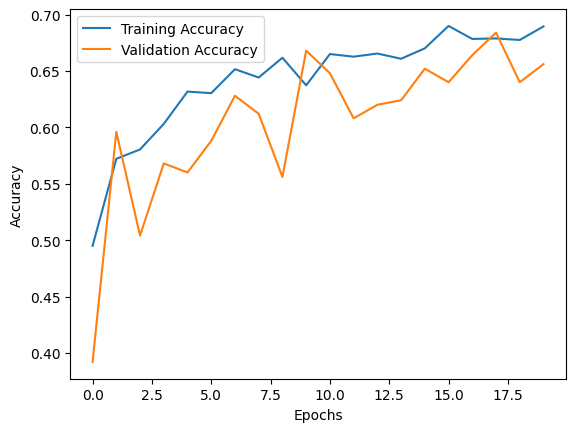

In [ ]:
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Best Model Test Accuracy: {test_accuracy * 100:.2f}%')

8/8 [==============================] - 1s 42ms/step - loss: 0.8816 - accuracy: 0.6840
Best Model Test Accuracy: 68.40%
